### PRUEBA DEL KIT "PYKRIGE" EN PYTHON

**KRIGING ORDINARIO 2D SOBRE MUESTRAS DE COBRE (MALLA CUADRADA) - CURSO GEOESTADÍSTICA PARA MINEROS EN PYTHON**


HEBER HERNÁNDEZ G. - NUBE MINERA (FEBRERO 2019)


https://nubeminera.cl/course/geoestadistica-para-mineros-en-python-gp/

**PyKrige**, es un Kit de herramientas de Kriging para Python, desarrollada por Benjamin S. Murphy (geólogo), la cual se presenta como herramienta básica a la hora de interpolar datos con previa modelización estructural.


La biblioteca si bien es escueta en cuanto a la cantidad de utilidades que posee, cumple con el propósito de generar mapas de variables a partir de muestras de una manera bastante sencilla. 


Lo positivo de PyKrige, es que ha tenido constantes actualizaciones desde su lanzamiento en el año 2014, esto al punto de ser compatible con la actual versión de Python (v3.7) y bibliotecas masificadas en el análisis de datos.  


En el presente documento, se revisará el uso de la herramienta, con el fin de construir un mapa de la variable cobre (Cu), a partir de 90 muestras que serán la base para la interpolación mediante Kriging Ordinario 2D. 


**Librerías y métodos a utilizar:**

In [1]:
import pykrige #biblioteca de geoestadística
import pykrige.kriging_tools as kt #herramientas para exportar e importar archivos .asc con biblioteca PyKrige
from pykrige.ok import OrdinaryKriging #Kriging Ordinario con PyKrige
import pandas as pd #biblioteca de manipulación y análisis de datos
import numpy as np #biblioteca de funciones matemáticas
import matplotlib.pyplot as plt #biblioteca de generación de gráficos
plt.style.use('ggplot') #estilo para gráficos en matplotlib
% matplotlib inline 

**Lectura del archivo:** *dataset_3.xlsx*

In [2]:
carpeta = "C:/Users/Heber/Desktop/curso_geopython/dataset_curso/" #carpeta contenedora del archivo de inicio
archivo = "dataset_3.xlsx" #dataset 2d concentraciones de cobre

df = pd.read_excel(carpeta + archivo) #rutina de lectura del archivo con Pandas

In [3]:
df.head(1) #3 variables (x,y,cu), donde x: Este, y: Norte, cu = Ley [Cu %]

,Este [x],Norte [y],Ley [Cu %]
0,200,200,1.67321


In [4]:
df.shape # 90 filas, 3 columnas (90 datos y 3 variables)

(90, 3)

**Visualización de las muestras:**

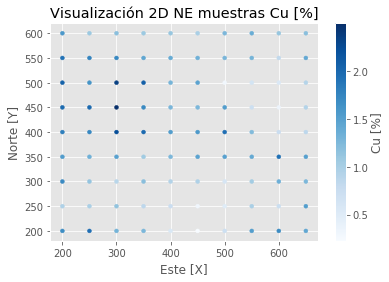

In [5]:
#variables convertidas a ndarray: Matriz Numpy

x = np.array([df["Este [x]"]])
y = np.array([df["Norte [y]"]])
cu = np.array([df["Ley [Cu %]"]])

#ploteo:

marker_size = 15
plt.scatter(x, y, marker_size, cu, cmap=plt.cm.Blues) #el estilo gist_rainbow es algo mas convencional.
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.title("Visualización 2D NE muestras Cu [%]")
cbar = plt.colorbar()
cbar.set_label("Cu [%]", labelpad=+1)
plt.show()

**Varianza de los datos:**

In [6]:
print("varianza Cu: ",round(cu.var(), 2)) #Referencia para el variograma.

varianza Cu:  0.22


**Supuesto isotropico:** Variograma experimental y ajuste con 1 estructura esférica (en un próximo notebook se revisaran variogramas direccionales para el caso de anisotropía). 

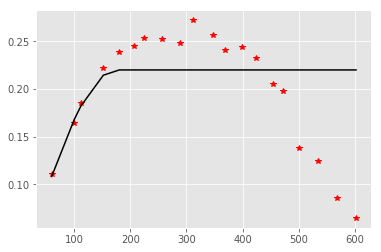

In [7]:
OK = OrdinaryKriging(x,y,cu, variogram_model='spherical', nlags=20, 
                     variogram_parameters= {'sill': 0.22, 'range': 175, 'nugget': 0}, enable_plotting=True, 
                    coordinates_type='euclidean')

#Ajuste del variograma experimental con un modelo esférico, 20 pasos, una meseta de 0.22 (lo cual es la varianza de los datos)
#, alcance de 175 metros y sin efecto pepita. 

**Creando el grid set:** Cuadricula que discretizará el área

In [8]:
grid_x = np.linspace(200, 660, num=46, endpoint=False) #Se crean 46 celdas de 10 metros desde min() - max() del eje X.
grid_y = np.linspace(200, 610, num=41, endpoint=False) #Se crean 41 celdas de 10 metros desde min() - max() del eje Y.

**Kriging Ordinario (z) y varianza de estimación (ss):**

In [9]:
z, ss = OK.execute('grid', grid_x, grid_y) # z es la ley de cobre y ss la varianza

**Guardando archivo ASCII:** 

In [10]:
kt.write_asc_grid(grid_x, grid_y, z, filename="kriging_ordinario.asc") #Kriging Ordinario en forma de matriz

In [11]:
kt.write_asc_grid(grid_x, grid_y, ss, filename="kriging_ordinario_var.asc") #Varianza de estimación en forma de matriz

**Abriendo el archivo ASCII:** PyKrige tiene un propio método de abrir el ".asc" personalmente no me gusta, por lo que utilizare Pandas.

*Se borran las 7 primeras filas que corresponden a información de n° de columnas, n° de filas, coordenadas de origen, tamaño de celdas y valores nulos.*

In [12]:
asc = pd.read_csv(carpeta + "kriging_ordinario.asc", header=None, skiprows=7, sep="\s+") 
asc.shape #comprobar que sean 41 filas y 46 columnas

(41, 46)

In [13]:
cu2 = np.array(asc) #Conversión pandas dataframe a ndarray

**Ploteo de los mapas de Kriging:**

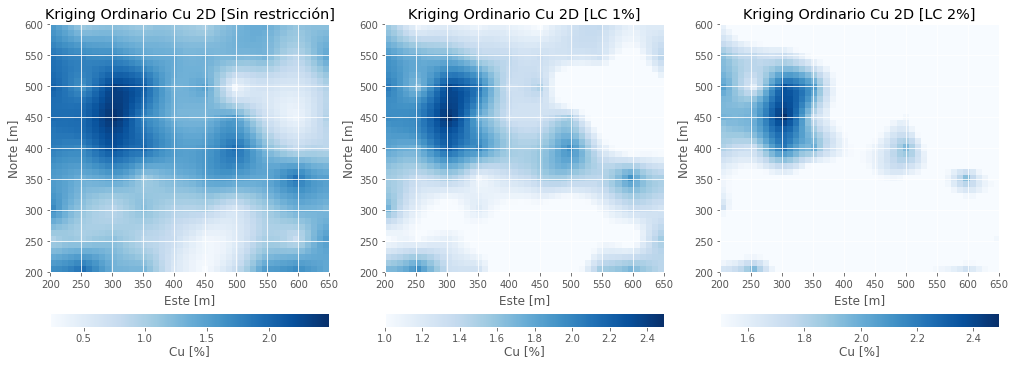

In [14]:
fig = plt.figure(figsize=(17,15))

plot1 = fig.add_subplot(131)
a = plt.imshow(cu2, cmap=plt.cm.Blues, extent=[200,650,200,600]) #gist_rainbow
plt.grid(True)
cbar = fig.colorbar(a, orientation='horizontal', pad=0.05)
cbar.set_label("Cu [%]", labelpad=+1)
plt.xlabel('Este [m]')
plt.ylabel('Norte [m]')
plt.title('Kriging Ordinario Cu 2D [Sin restricción]')

plot2 = fig.add_subplot(132)
b = plt.imshow(cu2, cmap=plt.cm.Blues, extent=[200,650,200,600], vmin=1)
plt.grid(True)
cbar = fig.colorbar(b, orientation='horizontal', pad=0.05)
cbar.set_label("Cu [%]", labelpad=+1)
plt.xlabel('Este [m]')
plt.ylabel('Norte [m]')
plt.title('Kriging Ordinario Cu 2D [LC 1%]')

plot3 = fig.add_subplot(133)
c = plt.imshow(cu2, cmap=plt.cm.Blues, extent=[200,650,200,600], vmin=1.5)
plt.grid(True)
cbar = fig.colorbar(c, orientation='horizontal', pad=0.05)
cbar.set_label("Cu [%]", labelpad=+1)
plt.xlabel('Este [m]')
plt.ylabel('Norte [m]')
plt.title('Kriging Ordinario Cu 2D [LC 2%]')

plt.show()

#Nota: las rejillas en los mapas, son solo una referencia de los ejes (no el tamaño de las celdas), las cuales son 10x10m